In [116]:
import pandas as pd
import matplotlib.pyplot as plt

In [117]:
# read csv file with data
igaba = pd.read_csv("20210330_iGABA_Genemorph_Mutants_Combined_analysis.csv")
igaba.head()

,Plate,Well,F0,Fmax,DFF
0,M0004,A1,2423,3901,0.609988
1,M0004,A2,1737,3112,0.791595
2,M0004,A3,1609,3283,1.040398
3,M0004,A4,507,1022,1.015779
4,M0004,A5,1529,2967,0.940484


In [118]:
# add a column that denotes whether data was noisy (1=noisy, 0=good)
igaba.loc[(igaba["F0"]>1000)|(igaba["Fmax"]>1500), 'Noisy'] = 0
igaba.loc[(igaba["F0"]<1000)&(igaba["Fmax"]<1500), 'Noisy'] = 1
igaba

,Plate,Well,F0,Fmax,DFF,Noisy
0,M0004,A1,2423,3901,0.609988,0.0
1,M0004,A2,1737,3112,0.791595,0.0
2,M0004,A3,1609,3283,1.040398,0.0
3,M0004,A4,507,1022,1.015779,1.0
4,M0004,A5,1529,2967,0.940484,0.0
5,M0004,A6,1843,3543,0.922409,0.0
6,M0004,A7,1426,1992,0.396914,0.0
7,M0004,A8,2624,3352,0.277439,0.0
8,M0004,A9,1252,2406,0.921725,0.0
9,M0004,A10,1520,3267,1.149342,0.0


In [119]:
# Select control wells
ctrls = igaba[igaba["Well"].isin(["A1","B1","C1"])]
ctrls

,Plate,Well,F0,Fmax,DFF,Noisy
0,M0004,A1,2423,3901,0.609988,0.0
12,M0004,B1,2619,4162,0.589156,0.0
24,M0004,C1,2051,3633,0.771331,0.0
96,M0005,A1,10181,15717,0.543758,0.0
108,M0005,B1,6279,9416,0.499602,0.0
120,M0005,C1,5681,8353,0.470340,0.0
192,M0006,A1,13398,18692,0.395134,0.0
204,M0006,B1,13726,19299,0.406018,0.0
216,M0006,C1,11936,17109,0.433395,0.0
288,M0007,A1,2890,4618,0.597924,0.0


In [120]:
plate1 = igaba[igaba["Plate"]=="M0004"]
plate2 = igaba[igaba["Plate"]=="M0005"]
plate3 = igaba[igaba["Plate"]=="M0006"]
plate4 = igaba[igaba["Plate"]=="M0007"]
plate5 = igaba[igaba["Plate"]=="M0008"]
plate6 = igaba[igaba["Plate"]=="M0009"]
plate7 = igaba[igaba["Plate"]=="M0010"]

In [121]:
# find average DFF of control wells in each plate
plate1_ctrls = ctrls[ctrls["Plate"]=="M0004"]
plate1_ctrl_dff = plate1_ctrls["DFF"].mean()

plate2_ctrls = ctrls[ctrls["Plate"]=="M0005"]
plate2_ctrl_dff = plate2_ctrls["DFF"].mean()

plate3_ctrls = ctrls[ctrls["Plate"]=="M0006"]
plate3_ctrl_dff = plate3_ctrls["DFF"].mean()

plate4_ctrls = ctrls[ctrls["Plate"]=="M0007"]
plate4_ctrl_dff = plate4_ctrls["DFF"].mean()

plate5_ctrls = ctrls[ctrls["Plate"]=="M0008"]
plate5_ctrl_dff = plate5_ctrls["DFF"].mean()

plate6_ctrls = ctrls[ctrls["Plate"]=="M0009"]
plate6_ctrl_dff = plate6_ctrls["DFF"].mean()

plate7_ctrls = ctrls[ctrls["Plate"]=="M0010"]
plate7_ctrl_dff = plate7_ctrls["DFF"].mean()

In [122]:
# Make a list of 96 wells for x-axis (0-95)
numwells = igaba.shape
wellidx = list(range(96))

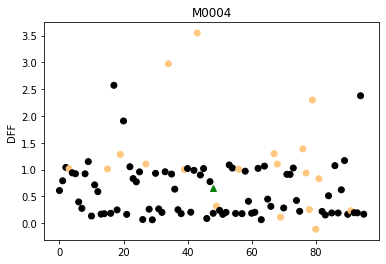

In [123]:
#All plates: black dots have good F values, orange dots are "Noisy",
#and the green triangle shows the average DFF of the control wells.

#Plate 1
plt.scatter(wellidx,plate1["DFF"],c=plate1["Noisy"],cmap='copper')
plt.plot(48,plate1_ctrl_dff,'g^')
plt.ylabel('DFF')
plt.title('M0004')
plt.savefig('M0004.png')

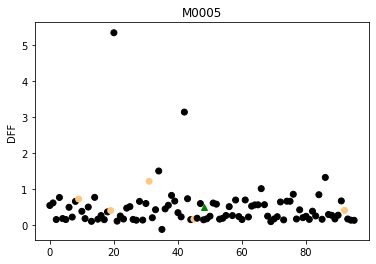

In [124]:
#Plate 2
plt.scatter(wellidx,plate2["DFF"],c=plate2["Noisy"],cmap="copper")
plt.plot(48,plate2_ctrl_dff,'g^')
plt.ylabel('DFF')
plt.title('M0005')
plt.savefig('M0005.png')

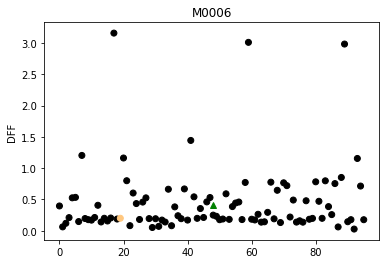

In [125]:
#Plate 3
plt.scatter(wellidx,plate3["DFF"],c=plate3["Noisy"],cmap="copper")
plt.plot(48,plate3_ctrl_dff,'g^')
plt.ylabel('DFF')
plt.title('M0006')
plt.savefig('M0006.png')

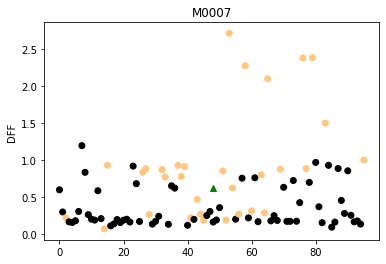

In [126]:
#Plate 4
plt.scatter(wellidx,plate4["DFF"],c=plate4["Noisy"],cmap="copper")
plt.plot(48,plate4_ctrl_dff,'g^')
plt.ylabel('DFF')
plt.title('M0007')
plt.savefig('M0007.png')

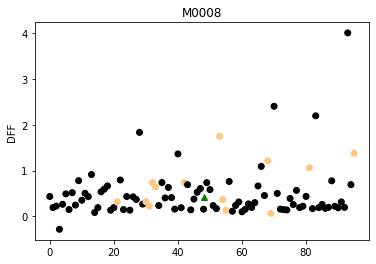

In [127]:
#Plate 5
plt.scatter(wellidx,plate5["DFF"],c=plate5["Noisy"],cmap="copper")
plt.plot(48,plate5_ctrl_dff,'g^')
plt.ylabel('DFF')
plt.title('M0008')
plt.savefig('M0008.png')

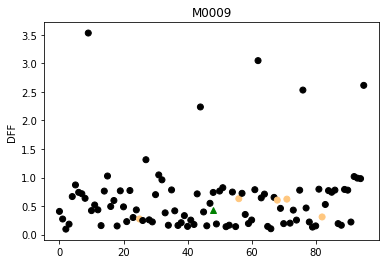

In [128]:
#Plate 6
plt.scatter(wellidx,plate6["DFF"],c=plate6["Noisy"],cmap="copper")
plt.plot(48,plate6_ctrl_dff,'g^')
plt.ylabel('DFF')
plt.title('M0009')
plt.savefig('M0009.png')

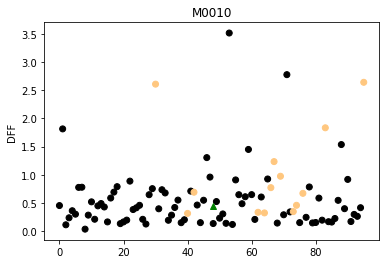

In [129]:
#Plate 7
plt.scatter(wellidx,plate7["DFF"],c=plate7["Noisy"],cmap="copper")
plt.plot(48,plate7_ctrl_dff,'g^')
plt.ylabel('DFF')
plt.title('M0010')
plt.savefig('M0010.png')

In [130]:
# make a list of all values that pass the noise test.
allPlates_goodF = igaba[igaba["Noisy"]==0]
allPlates_goodF

,Plate,Well,F0,Fmax,DFF,Noisy
0,M0004,A1,2423,3901,0.609988,0.0
1,M0004,A2,1737,3112,0.791595,0.0
2,M0004,A3,1609,3283,1.040398,0.0
4,M0004,A5,1529,2967,0.940484,0.0
5,M0004,A6,1843,3543,0.922409,0.0
6,M0004,A7,1426,1992,0.396914,0.0
7,M0004,A8,2624,3352,0.277439,0.0
8,M0004,A9,1252,2406,0.921725,0.0
9,M0004,A10,1520,3267,1.149342,0.0
10,M0004,A11,3165,3590,0.134281,0.0


In [131]:
# sort good data by descending DFF
# pick out the top 20 highest DFF wells
allPlates_goodF_sorted = allPlates_goodF.sort_values(by=["DFF"],ascending=False)
tophits = allPlates_goodF_sorted.head(20)

# filter out DFF values less than 2
tophits = tophits[tophits["DFF"]>=2]
tophits

,Plate,Well,F0,Fmax,DFF,Noisy
116,M0005,B9,663,4213,5.354449,0.0
477,M0008,H10,1956,9806,4.013292,0.0
489,M0009,A10,1010,4577,3.531683,0.0
629,M0010,E6,438,1980,3.520548,0.0
209,M0006,B6,3881,16144,3.159753,0.0
138,M0005,D7,759,3146,3.144928,0.0
542,M0009,F3,641,2595,3.048362,0.0
251,M0006,E12,3840,15406,3.011979,0.0
281,M0006,H6,1500,5977,2.984667,0.0
647,M0010,F12,1623,6135,2.780037,0.0


In [132]:
# sort the hit list by plate number
tophits_sorted = tophits.sort_values(by=["Plate"])
tophits_sorted

,Plate,Well,F0,Fmax,DFF,Noisy
94,M0004,H11,1006,3398,2.377734,0.0
17,M0004,B6,1451,5184,2.572708,0.0
116,M0005,B9,663,4213,5.354449,0.0
138,M0005,D7,759,3146,3.144928,0.0
251,M0006,E12,3840,15406,3.011979,0.0
281,M0006,H6,1500,5977,2.984667,0.0
209,M0006,B6,3881,16144,3.159753,0.0
454,M0008,F11,625,2130,2.408000,0.0
477,M0008,H10,1956,9806,4.013292,0.0
467,M0008,G12,1328,4248,2.198795,0.0
